# FC architecture for image classification
An implementation of MNIST image classifier, based on Fully Connected (Dense) architecture.

In [1]:
# imports:
from tensorflow import keras
from keras.datasets.mnist import load_data
from keras.layers import BatchNormalization, Dropout, MaxPool1D, Input, ReLU, Flatten, Dense
from keras.utils import to_categorical
from keras import Model
from keras.utils import plot_model
from keras.optimizers import SGD, Adam
from matplotlib import pyplot as plt
import numpy as np
from keras.utils import plot_model

Using TensorFlow backend.


# Load the dataset
1) load dataset

2) normalize it to range [-1,1]

3) 1-hot encoding of the labels

4) reshape the dataset into shape (num_samples,-1)


In [2]:
# 1)
(X_train, Y_train), (X_test, Y_test) = load_data()
# 2)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')
X_train = (X_train / 255.) * 2 - 1
X_test = (X_test / 255.) * 2 - 1
# 3)
Y_train, Y_test = to_categorical(Y_train), to_categorical(Y_test)
# 4)
num_samples_train, h, w = X_train.shape
num_samples_test, h, w = X_test.shape

X_train = np.reshape(X_train, (num_samples_train,-1))
X_test = np.reshape(X_test, (num_samples_test,-1))

assert(len(X_train.shape)==2 and len(X_test.shape)==2)

# Architecure
implementation of a basic Fully Connected architecture for image classification.
Will consist Dense layers and ReLU activations 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290

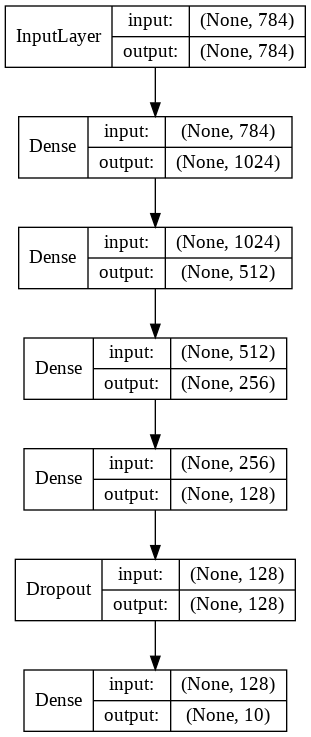

In [3]:
inputs = Input((h*w,))
# size = (_,784)
output = Dense(1024, activation='relu')(inputs)
# size = (_,1024)
output = Dense(512, activation='relu')(output)
# size = (_,512)
output = Dense(256, activation='relu')(output)
# size = (_,256)
output = Dense(128, activation='relu')(output)
# size = (_,128)
output = Dropout(0.5)(output)
output = Dense(10, activation='softmax')(output)

FC_classifier = Model(inputs, output)
FC_classifier.compile('adam', loss='binary_crossentropy',metrics=['accuracy'])
FC_classifier.summary()
plot_model(FC_classifier, to_file='FC_classifier_arch.png', show_shapes=True, show_layer_names=False)

# Train
Train the model to minimize the loss function

In [4]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# a callback is an object that performs tasks during the fit process
my_callbacks = [EarlyStopping(patience=5, restore_best_weights=True),
                ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5')]

history = FC_classifier.fit(x=X_train, y=Y_train, batch_size=32, epochs=100, validation_data=[X_test, Y_test],callbacks=my_callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 133us/step - loss: 0.0638 - accuracy: 0.9788 - val_loss: 0.0296 - val_accuracy: 0.9900
Epoch 2/100
60000/60000 [==============================] - 8s 125us/step - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0326 - val_accuracy: 0.9899
Epoch 3/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0236 - val_accuracy: 0.9920
Epoch 4/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.0207 - val_accuracy: 0.9936
Epoch 5/100
60000/60000 [==============================] - 7s 125us/step - loss: 0.0209 - accuracy: 0.9936 - val_loss: 0.0212 - val_accuracy: 0.9936
Epoch 6/100
60000/60000 [==============================] - 7s 125us/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.0190 - val_accuracy: 0.9941
Epoch 7/100
60000/60000 [==============================]

# Analyze training process and results


1.   Accuracy evaluation on the entire test set
2.   Visualize training accuracy & loss



In [5]:
# 1)
_, acc = FC_classifier.evaluate(x=X_test, y=Y_test)
print(f'CNN_classifier accuracy on test set - {acc:02f}')

10000/10000 [==============================] - 0s 43us/step
CNN_classifier accuracy on test set - 0.995730


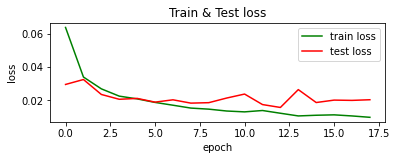

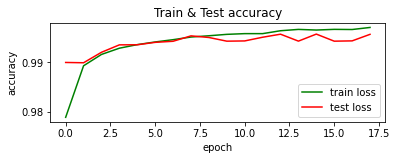

In [6]:
# 2)
# retrieve losses
train_loss = history.history['loss']
test_loss = history.history['val_loss']
# retrieve accuracies
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# plot loss graph
plt.subplot(2,1,1)
plt.title('Train & Test loss')
plt.plot(train_loss,color='green')
plt.plot(test_loss,color='red')
plt.legend(['train loss', 'test loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# plot accuracy graph
plt.subplot(2,1,2)
plt.title('Train & Test accuracy')
plt.plot(train_acc,color='green')
plt.plot(test_acc,color='red')
plt.legend(['train loss', 'test loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()